# Pauta Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas


## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    heterogeneidad, concentración 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [6]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Asimetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

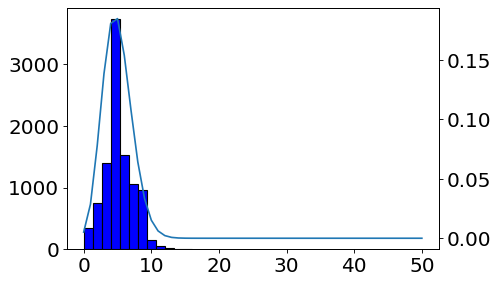

In [2]:
## simulación de size valores v.a. binomial
size=10000
n=50
p=0.1
datos_bin =stats.binom.rvs(n=n, p=p, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


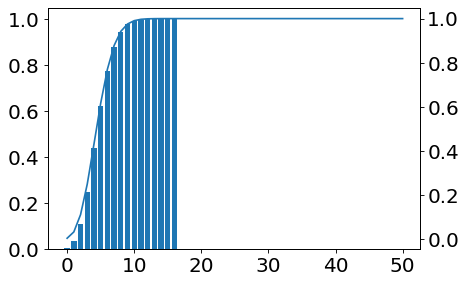

In [3]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_bin = ecdf(datos_bin)
ax.bar(x,cum_bin)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(51))
##
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec)
plt.draw()


In [4]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 4.9721  teórica:  5.0
varianza empírica: 4.425921590000172  teórica:  4.5
asimetría empírica: 0.3833417847428112 teórica:  0.3771236166328254
curtosis empírico:  0.14675871101380222 teórico:  0.10222222222222219


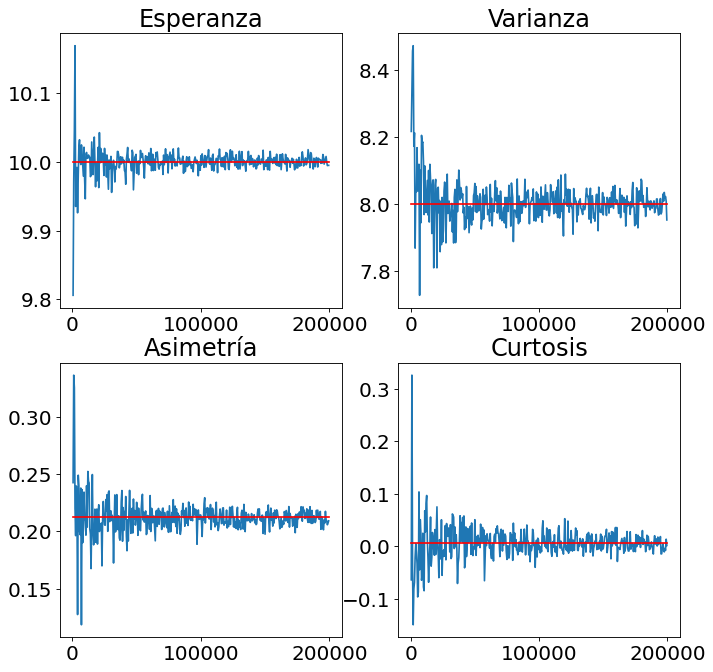

In [5]:
n=50
p=0.2
p_teo = n*p
var_teo = n*p*(1-p)
asim_teo = (1-2*p)/(math.sqrt(n*p*(1-p)))
curtos_teo = (1-6*p*(1-p))/(n*p*(1-p))
promedio = []
var_emp = []
asim = []
curtos = []
izq= 500
der = 200000
step = 500
vec = range(izq,der,step)
for size in vec:
    
    datos_bin =stats.binom.rvs(n=n, p=p, size=size)
    p_aux = sum(datos_bin)/size
    promedio.append(p_aux)
    var_emp.append(sum((datos_bin - p_aux)**2)/size)
    asim.append(stats.skew(datos_bin))
    curtos.append(stats.kurtosis(datos_bin))
    
fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(vec,promedio)
axs[0,0].plot((izq,der), (p_teo, p_teo), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(vec,var_emp)
axs[0,1].plot((izq,der), (var_teo, var_teo), color='red')
axs[1,0].set_title("Asimetría")
axs[1,0].plot(vec,asim)
axs[1,0].plot((izq,der), (asim_teo, asim_teo), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(vec,curtos)
axs[1,1].plot((izq,der), (curtos_teo, curtos_teo), color='red')

#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

#### Respuestas
1) Todas las medidas se estabilizan sobre 10^5 simulaciones.  La que presenta el mayor error es la varianza

2) Cambiando el valor de n: 10, 100, 1000 no hay cambios mayores en las tasas de convergencia.  En el caso de p, al acercarse a valores extremos (0 o 1, menos aleatorio) mejoran las tasas de convergencia y empeoran al acercarse a 0.5 (mas aleatorio).

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

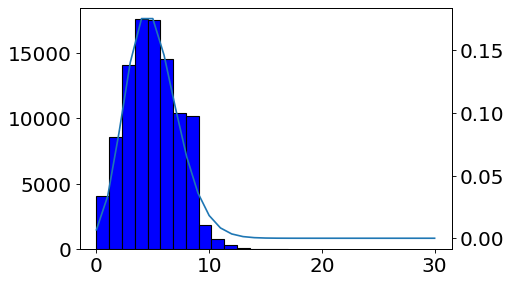

In [7]:
## simulación de size valores v.a. poisson
size=100000
mu = 5
n=30
datos_pois =stats.poisson.rvs(mu=mu, size=size) 
binwidth = 2
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_pois, color = 'blue', edgecolor = 'black', bins = int(n/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.pmf(k=i,mu=mu))
ax2.plot(vec,pvec)
plt.draw()

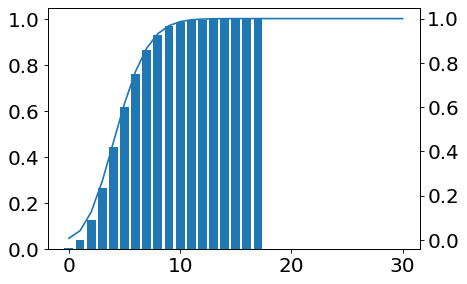

In [8]:
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_pois = ecdf(datos_pois)
ax.bar(x,cum_pois)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(n+1))
##
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(k=i, mu=mu))
ax2.plot(vec,pvec)
plt.draw()


In [9]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_pois)/size
var_emp = sum((datos_pois - promedio)*(datos_pois-promedio))/size
asim = stats.skew(datos_pois)
curtos = stats.kurtosis(datos_pois)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', mu)
print('asimetría empírica:', asim, 'teórica: ',1/math.sqrt(mu))
print('curtosis empírico: ', curtos, 'teórico: ',(1/mu))

esperanza empírica: 4.99126  teórica:  5
varianza empírica: 5.006783612401236  teórica:  5
asimetría empírica: 0.4438734188160878 teórica:  0.4472135954999579
curtosis empírico:  0.17645553167461658 teórico:  0.2


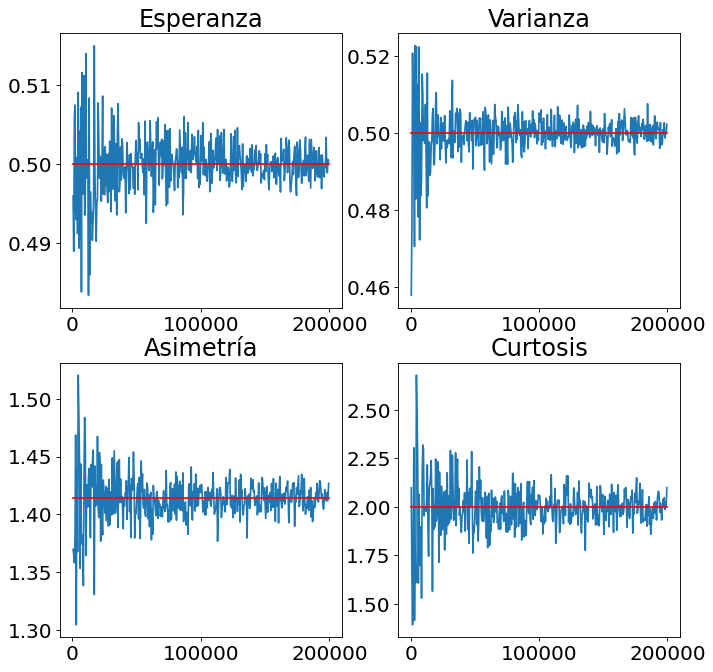

In [10]:
mu=0.50
p_teo = mu
var_teo = mu
asim_teo = 1/math.sqrt(mu)
curtos_teo = 1/mu
promedio = []
var_emp = []
asim = []
curtos = []
izq= 500
der = 200000
step = 500
vec = range(izq,der,step)
for size in vec:
    
    datos_pois =stats.poisson.rvs(mu=mu, size=size)
    p_aux = sum(datos_pois)/size
    promedio.append(p_aux)
    var_emp.append(sum((datos_pois - p_aux)**2)/size)
    asim.append(stats.skew(datos_pois))
    curtos.append(stats.kurtosis(datos_pois))
    
fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(vec,promedio)
axs[0,0].plot((izq,der), (p_teo, p_teo), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(vec,var_emp)
axs[0,1].plot((izq,der), (var_teo, var_teo), color='red')
axs[1,0].set_title("Asimetría")
axs[1,0].plot(vec,asim)
axs[1,0].plot((izq,der), (asim_teo, asim_teo), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(vec,curtos)
axs[1,1].plot((izq,der), (curtos_teo, curtos_teo), color='red')

El comportamiento de la convergencia es similar. Si aumenta el factor de escala mu, la aproximación de la varianza es menos exacta y si disminuye mejora.

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generabdora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

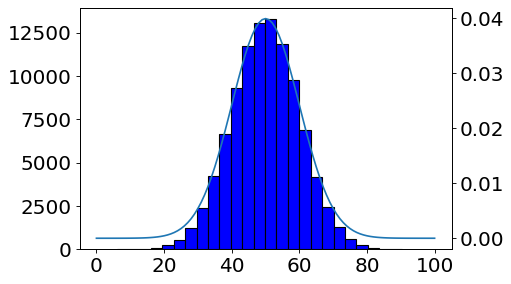

In [11]:
## simulación de size valores v.a. normal
size=100000
mu=50
sigma=10
datos_norm =stats.norm.rvs(loc=mu, scale= sigma, size=size) 
binwidth = 4
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/binwidth))
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))
ax2.plot(vec,pvec)
plt.draw()


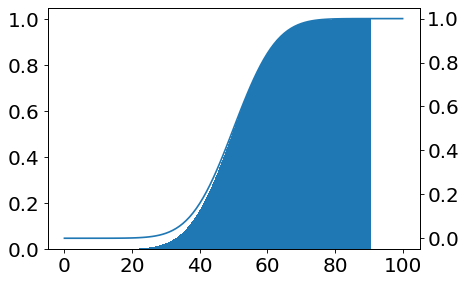

In [12]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)
## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [13]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu, 'error porcentual', (promedio-mu)/mu*100)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma, 'error porcentual', (var_emp-sigma**2)/(sigma**2)*100)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)


esperanza empírica: 49.95386762838576  teórica:  50 error porcentual -0.09226474322848333
varianza empírica: 100.15822552417534  teórica:  100 error porcentual 0.15822552417533586
asimetría empírica: -0.012993560026627913 teórica:  0
curtosis empírico:  0.003441106022755047 teórico:  0


#### Ejercicio 3: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)


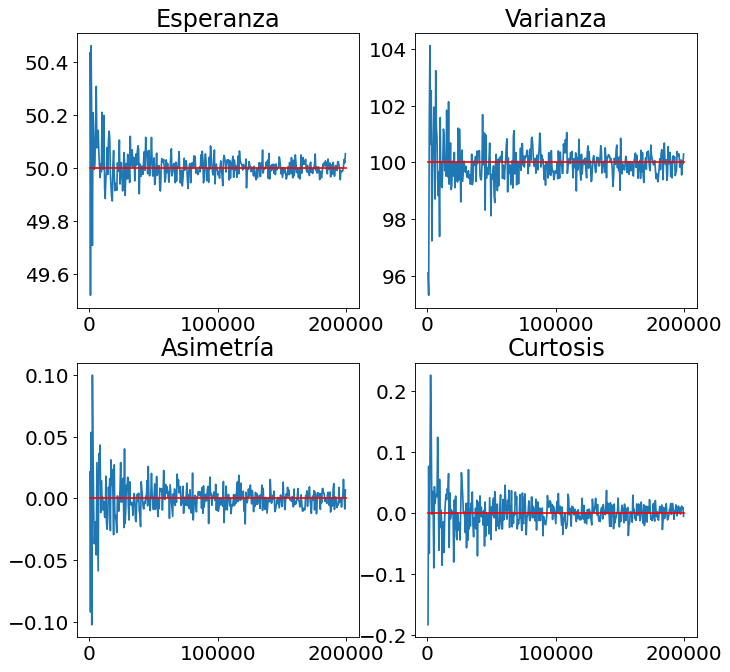

In [14]:
mu=50
sigma = 10
p_teo = mu
var_teo = sigma**2
asim_teo = 0
curtos_teo = 0
promedio = []
var_emp = []
asim = []
curtos = []
izq= 500
der = 200000
step = 500
vec = range(izq,der,step)
for size in vec:
    
    datos_norm =stats.norm.rvs(loc=mu,scale=sigma,size=size)
    p_aux = sum(datos_norm)/size
    promedio.append(p_aux)
    var_emp.append(sum((datos_norm - p_aux)**2)/size)
    asim.append(stats.skew(datos_norm))
    curtos.append(stats.kurtosis(datos_norm))
    
fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(vec,promedio)
axs[0,0].plot((izq,der), (p_teo, p_teo), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(vec,var_emp)
axs[0,1].plot((izq,der), (var_teo, var_teo), color='red')
axs[1,0].set_title("Asimetría")
axs[1,0].plot(vec,asim)
axs[1,0].plot((izq,der), (asim_teo, asim_teo), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(vec,curtos)
axs[1,1].plot((izq,der), (curtos_teo, curtos_teo), color='red')

#### Respuesta: 
1. Se obtiene una buena aproximación  partir de 10^5 simulaciones, con un errores porcentuales menores al 0.1% en el caso de la media y 0.25%  en el caso de la varianza y errores absolutos inferiores a 0.05 en asimetría y kurtosis. 
2. Al aumentar el valor de la varianza, se requieren mas simulaciones para alcanzar la misma precisión. Inversamente, para valores de  varianza menor, se requieren menos simulaciones para aproximar bien los valores teóricos. El valor el parámetro de localización no influye en la tasa de convergencia.

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua chi-cuadrado de $k$ grados de libertad.

In [15]:
## simulación de size valores v.a. chi-cuadrado
size=10000
k = 2
datos_chi2 =stats.chi2.rvs(df=k, size=size) 
max = np.amax(datos_chi2)
step = max/100
vec = [0 + (x * step) for x in range(0, 100)] 
  


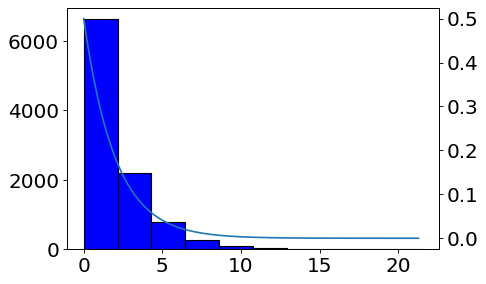

In [16]:

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_chi2, color = 'blue', edgecolor = 'black')
## probabilidad teórica
ax2 = ax.twinx()

##
pvec = []
for x in vec:
    pvec.append(stats.chi2.pdf(x=x, loc=0, scale= 1, df=k))
ax2.plot(vec,pvec)
plt.draw()

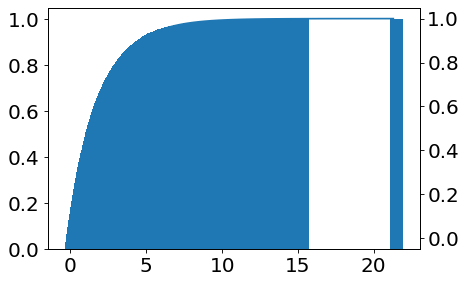

In [17]:
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_chi2 = ecdf(datos_chi2)
ax.bar(x,cum_chi2)
## probabilidad teórica
ax2 = ax.twinx()

##
pvec = []
for x in vec:
    pvec.append(stats.chi2.cdf(x=x, loc=0, scale=1, df=k))
ax2.plot(vec,pvec)
plt.draw()


In [20]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_chi2)/size
var_emp = sum((datos_chi2- promedio)*(datos_chi2-promedio))/size
asim = stats.skew(datos_chi2)
curtos = stats.kurtosis(datos_chi2)
print('esperanza empírica:',promedio,' teórica: ',k)
print('varianza empírica:',var_emp,' teórica: ', (2*k))
print('asimetría empírica:', asim, 'teórica: ', math.sqrt(8/k))
print('curtosis empírico: ', curtos, 'teórico: ',(12/k))


esperanza empírica: 1.9844569454328318  teórica:  2
varianza empírica: 3.9127820033221905  teórica:  4
asimetría empírica: 1.9125565538391298 teórica:  2.0
curtosis empírico:  5.291916095476024 teórico:  6.0


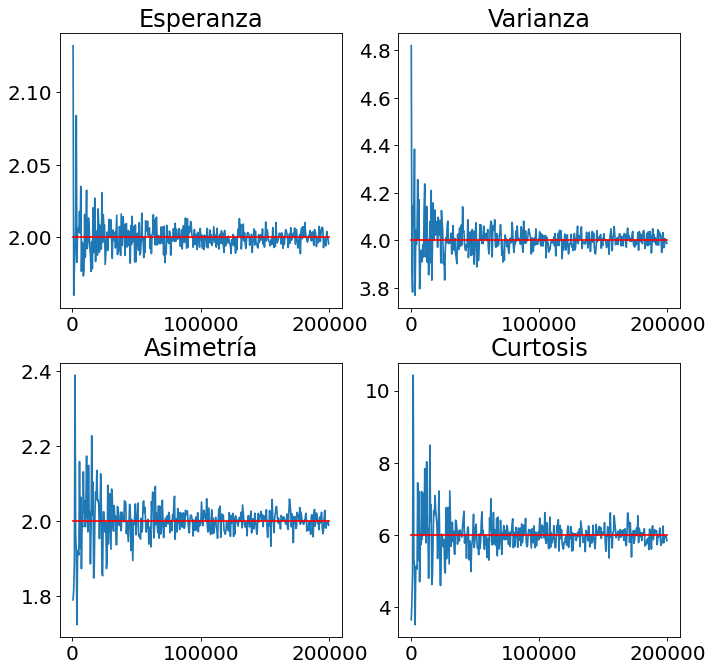

In [21]:

k= 2
p_teo = k
var_teo = 2*k
asim_teo = math.sqrt(8/k)
curtos_teo = 12/k
promedio = []
var_emp = []
asim = []
curtos = []
izq= 500
der = 200000
step = 500
vec = range(izq,der,step)
for size in vec:
    
    datos_chi2 =stats.chi2.rvs(df=k, size=size) 
    p_aux = sum(datos_chi2)/size
    promedio.append(p_aux)
    var_emp.append(sum((datos_chi2 - p_aux)**2)/size)
    asim.append(stats.skew(datos_chi2))
    curtos.append(stats.kurtosis(datos_chi2))
    
fig, axs = plt.subplots(2, 2,figsize=(10, 10), dpi=80)
axs[0,0].set_title("Esperanza")
axs[0,0].plot(vec,promedio)
axs[0,0].plot((izq,der), (p_teo, p_teo), color='red')
axs[0,1].set_title("Varianza")
axs[0,1].plot(vec,var_emp)
axs[0,1].plot((izq,der), (var_teo, var_teo), color='red')
axs[1,0].set_title("Asimetría")
axs[1,0].plot(vec,asim)
axs[1,0].plot((izq,der), (asim_teo, asim_teo), color='red')
axs[1,1].set_title("Curtosis")
axs[1,1].plot(vec,curtos)
axs[1,1].plot((izq,der), (curtos_teo, curtos_teo), color='red')

Se aprecia convergencia a partir de 10^5 simulaciones

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb